In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
df=pd.read_csv(r"E:\AIML College\Assignment Five\tips - tips.csv")

In [3]:
df.shape

(244, 7)

In [4]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [5]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [7]:
df.nunique()

total_bill    229
tip           123
sex             2
smoker          2
day             4
time            2
size            6
dtype: int64

In [8]:
df['day'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [9]:
df['day'].nunique()

4

In [10]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [11]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [12]:
x=df.drop(['tip'],axis=1)

In [13]:
x.head()

,total_bill,sex,smoker,day,time,size
0,16.99,Female,No,Sun,Dinner,2
1,10.34,Male,No,Sun,Dinner,3
2,21.01,Male,No,Sun,Dinner,3
3,23.68,Male,No,Sun,Dinner,2
4,24.59,Female,No,Sun,Dinner,4


In [14]:
y=df['tip']

In [15]:
y.head()

0    1.01
1    1.66
2    3.50
3    3.31
4    3.61
Name: tip, dtype: float64

In [16]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   sex         244 non-null    object 
 2   smoker      244 non-null    object 
 3   day         244 non-null    object 
 4   time        244 non-null    object 
 5   size        244 non-null    int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 11.6+ KB


In [17]:
Sex=pd.get_dummies(x['sex'], drop_first=True)

In [18]:
x=pd.concat([x,Sex], axis=1)

In [19]:
x.head()

,total_bill,sex,smoker,day,time,size,Male
0,16.99,Female,No,Sun,Dinner,2,False
1,10.34,Male,No,Sun,Dinner,3,True
2,21.01,Male,No,Sun,Dinner,3,True
3,23.68,Male,No,Sun,Dinner,2,True
4,24.59,Female,No,Sun,Dinner,4,False


In [20]:
Smoker=pd.get_dummies(x['smoker'], drop_first=True)

In [21]:
Day=pd.get_dummies(x['day'], drop_first=True)

In [22]:
Time=pd.get_dummies(x['time'], drop_first=True)

In [23]:
x=pd.concat([x,Smoker,Day,Time], axis=1)

In [24]:
x.head()

,total_bill,sex,smoker,day,time,size,Male,Yes,Sat,Sun,Thur,Lunch
0,16.99,Female,No,Sun,Dinner,2,False,False,False,True,False,False
1,10.34,Male,No,Sun,Dinner,3,True,False,False,True,False,False
2,21.01,Male,No,Sun,Dinner,3,True,False,False,True,False,False
3,23.68,Male,No,Sun,Dinner,2,True,False,False,True,False,False
4,24.59,Female,No,Sun,Dinner,4,False,False,False,True,False,False


In [25]:
x=x.drop(['sex', 'smoker', 'day', 'time'], axis=1)

In [26]:
x.head()

,total_bill,size,Male,Yes,Sat,Sun,Thur,Lunch
0,16.99,2,False,False,False,True,False,False
1,10.34,3,True,False,False,True,False,False
2,21.01,3,True,False,False,True,False,False
3,23.68,2,True,False,False,True,False,False
4,24.59,4,False,False,False,True,False,False


In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [28]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [29]:
y_pred = regressor.predict(x_test)

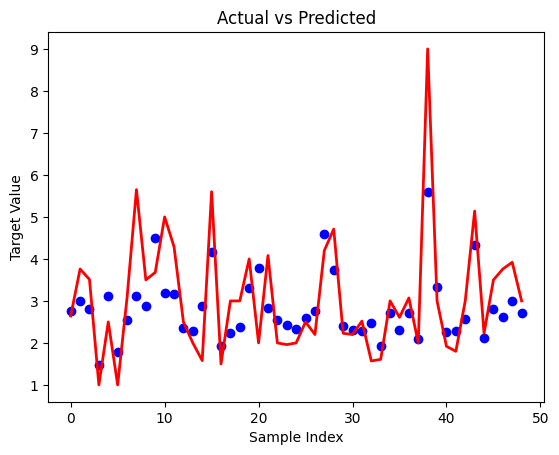

In [30]:
plt.plot(y_test.values, label='Actual', color='red', linewidth=2)
plt.scatter(range(len(y_pred)), y_pred, label='Predicted', color='blue')

plt.title('Actual vs Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.show()


In [31]:
regressor.coef_

array([ 0.08561436,  0.20932895, -0.00737383, -0.03190042, -0.2625877 ,
       -0.15896168, -0.55434395,  0.45105997])

In [32]:
regressor.intercept_

0.8957857180023221